<a href="https://colab.research.google.com/github/Dkepffl/2022-2-ESAA/blob/main/Assignment/Assignment221202_Keras3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PART 04 합성곱 신경망(CNN)**

### **01 합성곱 신경망**
- **합성곱 신경망(CNN : Convolutional Neural Network)** : 데이터가 가진 특징들의 패턴을 학습하는 알고리즘. 컴퓨터 비전 분야에서 많이 사용되는데, 대표적으로 이미지 분류(Image Classification), 객체 탐지(Object Detection), 스타일 전이(Style Transfer) 등을 예로 들 수 있다.
  - **이미지 분류(Image Classification)** : 이미지를 모델에게 학습시켜, 모델이 이미지의 특징을 추출해 각 이미지를 분류하는 문제.
  - **객체 탐지(Object Detection)** : 이미지에서 특정한 객체를 인식하고, 이미지의 어디에 있는지 위치를 파악하는 기술. 경계 박스를 찾는 문제는 회귀 분석, 클래스를 예측하는 문제는 분류 문제가 된다.
  - **스타일 전이(Style Transfer)** : 콘텐츠 이미지와 스타일 참조 이미지를 이용해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀서 새로운 이미지를 생성하는 기술


#### | **1-1 이미지 표현**
- 컴퓨터가 이미지나 영상을 이해하기 위해서는 이미지(혹은 영상)를 숫자로 표현해야 한다.
- MNIST 데이터셋을 떠올려보면, 손글씨 이미지는 0~255 사이의 숫자로 각 픽셀의 화소 값을 표현하였다. 숫자 0은 완전히 검은 색, 숫자 255는 흰색을 의미한다.
- 한편 컬러 이미지는 R, G, B 채널로 구성된 3자의 이미지를 겹쳐서 표현한 것이다.
  - 각 채널의 이미지는 흑백 이미지와 마찬가지로 0~255 사이의 숫자로 나타낸다.
  - 숫자가 클수록 해당 색상을 더 강하게 표현한다.
  - 채널이 하나의 이미지로 구분된다.

#### | **1-2 합성곱(Convolution)**
- **합성곱 연산** : 입력 이미지에 대하여 일반적으로 정방형 크기의 커널(kernel, 혹은 필터(filter)라고도 한다.)을 사용하여, 입력 이미지의 특성을 추출하는 방법
- 합성곱 연산을 통해 추출된 이미지를 **특성맵(feature map)**이라고 한다.
- 이 특성맵을 딥러닝 모델 학습에 사용하면 훨씬 더 좋은 성능을 보인다.
- 입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 켭치도록 투영한다. 이렇게 겹치는 부분에 대해 합성곱 연산을 수행한다.
- 합성곱 연산 결과값은 element-wise 곱셈 연산 후, 모두 더한 값이다. 

#### | **1-3 채널(channel)**
- **채널(channel)** : 입력 이미지를 구성하는 2차원 배열의 개수.
- 흑백 이미지의 경우 단일 채널(채널의 개수가 1개)이며, 컬러 이미지의 경우, R, G, B로 3개의 채널을 가지는 이미지이다.
- 컬러 이미지의 shape는 (세로 픽셀 사이즈, 가로 픽셀 사이즈, 채널 수)이다.
- 여러 개의 채널을 갖는 경우, 각 채널마다 커널을 하나씩 적용하여, 합성곱 연산을 수행한다. 그럼 입력 이미지의 채널 개수만큼 합성곱 연산 결과가 생성되고, 이를 element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵이 완성된다.

#### | **1-4 스트라이드(stride)**
- 커널은 이미지의 좌측 상단부터 우측으로 이동하며, 합성곱 연산을 수행하여 특성맵에 값을 채워나가는데, 이때 이동하는 간격을 **스트라이드(stride)**라고 한다.
- 주로 1 또는 2로 설정한다.
- 텐서플로 케라스에서는 Conv2D 레이어의 `strides` 매개변수를 이용하여 스트라이드를 지정할 수 있다.

#### | **1-5 패딩(padding)**
- 커널 크기와 스트라이드를 조정하여도, 추출된 특성맵의 사이즈는 입력 이미지 대비 줄어들게 된다.
- 하지만 추출된 특성맵의 크기가 입력 이미지에 비해 줄지 않도록 패딩(padding)을 설정할 수 있다.
- 일반적으로 많이 사용하는 **zero-padding**은 입력 이미지의 가장 자리를 패딩값 0으로 채워 합성곱 연산을 수행한다.
- 텐서플로 케라스의 Conv2D 레이어에서 `padding='same'`으로 설정하여 zero-padding을 적용할 수 있다.

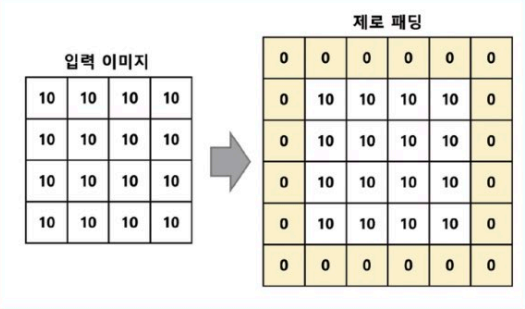

#### | **1-6 특성맵(feature map) 사이즈**
<center>$$(Output Height, Output Width) = (\frac{ImageHeight + 2P - KernelHeight}{S}+1, \frac{ImageWidth + 2P - KernelWidth}{S}+1)$$</center>

- ImageHeight,ImageWidth : 입력 이미지의 크기(input size)
- KernelHeight, KernelWidth : 커널의 크기(kernel size)
- S : 스트라이드(strides)
- P : 패딩(padding)
- Output Height, Output Width : 출력값, 즉, 특성맵의 크기(output size)

#### | **1-7 풀링(pooling)**
- 풀링(pooling) 레이어 : 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
  - 연산량이 감소한다.
  - 또한 과대적합을 방지할 수 있다.
- 풀링 레이어는 크개 최대 풀링(max pooling)과 평균 풀링(average pooling)으로 나뉜다.
- 풀링 레이어도 스트라이드 값을 가진다.

### **02 간단한 모델 생성**
mnist 손글씨 데이터셋을 이용한 간단한 구조의 합성곱 신경망 모델을 만들어보자.

#### | **2-1 데이터 로드 및 전처리**
- 먼저 텐서플로 라이브러리를 불러온다.
- 그다음 훈련/검증 데이터셋으로 나눠 데이터셋을 불러온다.

In [1]:
# tensorflow 모듈 import 
import tensorflow as tf

In [2]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- 훈련 데이터셋은 60,000개의 데이터, 검증 데이터셋은 10,000개의 데이터로 구성되어 있다.
- 피처 데이터셋에는 가로, 세로 각각 28픽셀인 손글씨 이미지가 있으며 타겟값에는 해당 이미지의 숫자 레이블 값이 포함되어 있다.
- 훈련 데이터셋의 첫 번째 이미지(인덱스 0)을 출력해보자.

In [3]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

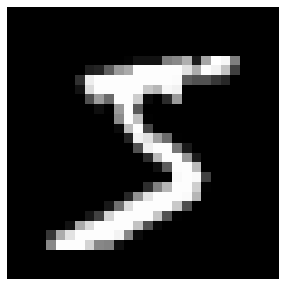

In [4]:
plot_image(x_train, 0)

- 훈련/검증 데이터셋의 이미지 픽셀을 나타내는 값의 최소/최대값을 확인해보자.

In [5]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


- 이미지 픽셀이 0~255 범위의 숫자로 구성된 것을 알 수 있다.
- 안정적인 딥러닝 모델 학습을 위해 입력 이미지 픽셀값을 정규화하자.
- 이미지 픽셀값을 최대값인 255로 나누어주면 0~1 범위로 스케일링 된다.

In [7]:
# 정규화(Normalization)
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 0.00392156862745098
0.0 0.00392156862745098


- mnist 데이터셋은 흑백 이미지로 채널이 1개이다.
- CNN 모델에 입력하기 위해서 색상을 나타내는 채널을 추가해주자.
- 다음 코드는 새로운 축인 `tf.newaxis`를 텐서 배열에 직접 추가하는 방식이다.
- 이렇게 추가하면 텐서는 (60000, 28, 28, 1) 형태로 변환된다.

In [8]:
# 채널 추가
print("변환 전 텐서 형태 :", x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print("변환 후 텐서 형태 :", x_train_in.shape, x_valid_in.shape)

변환 전 텐서 형태 : (60000, 28, 28) (10000, 28, 28)
변환 후 텐서 형태 : (60000, 28, 28, 1) (10000, 28, 28, 1)


#### | **2-2 Sequential API로 모델 생성 및 학습**
- Sqeuntial API를 이용하여 합성곱 레이어 1개, 풀링 레이어 1개로 구성된 간단한 모델을 만들어보자.
- 최종 분류기로 Dense 레이어를 적용하기 위해 Flatten 층을 추가하여 1차원 배열로 변환한다.
- 합성곱 레이어는 Conv2D 레이어를 사용하며, (3, 3) 크기의 서로 다른 32가지 종류의 커널을 적용한다. 활성화 함수로는 ReLU를 적용한다.
- 이미지의 크기를 축소하는 풀링 레이어는 (2, 2) 크기로 max pooling을 적용한다.
- 출력 레이어는 노드 개수를 클래스 개수에 따라 10개로 설정하고, 다중 분류 문제이므로 활성화 함수로 softmax를 적용한다.

In [9]:
# Sequential API를 사용하여 샘플 모델 생성
model = tf.keras.Sequential([
    # 합성곱 레이어 : Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv'),

    # 풀링 레이어 : Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),

    # Classifier 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

- 이제 옵티마이저, 손실함수, 평가지표를 설정한 후, 모델을 컴파일한다.
- 그리고 `fit()` 메소드를 이용하여 모델을 학습시킨다. `epoch`은 10으로 지정한다.

In [11]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 1.1376 - accuracy: 0.7279 - val_loss: 0.4856 - val_accuracy: 0.8686
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4212 - accuracy: 0.8807 - val_loss: 0.3599 - val_accuracy: 0.8981
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3528 - accuracy: 0.8958 - val_loss: 0.3209 - val_accuracy: 0.9075
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3278 - accuracy: 0.9038 - val_loss: 0.3077 - val_accuracy: 0.9110
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3142 - accuracy: 0.9078 - val_loss: 0.2940 - val_accuracy: 0.9146
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3045 - accuracy: 0.9106 - val_loss: 0.2919 - val_accuracy: 0.9164
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2980 - accuracy: 0.9130 - val_loss: 0.2843 -

- `evaluate()` 메소드를 이용하여 검증셋에 대한 정확도를 계산해보면, 약 98%의 정확도를 보인다.

In [13]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 8ms/step - loss: 0.2734 - accuracy: 0.9207


[0.27341383695602417, 0.9207000136375427]

- `history`에 저장해둔 모델 훈련 결과를 이용하여, 10 epoch 동안 모델의 예측 오차와 정확도를 그래프로 나타내보자.

In [14]:
# 훈련 과정 시각화 함수
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

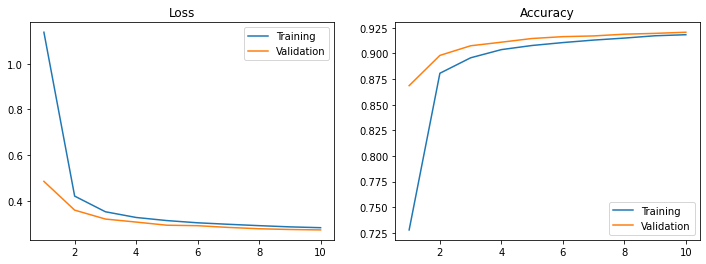

In [15]:
plot_loss_acc(history, 10)

- 그래프를 보면 훈련 데이터셋에 대한 Loss는 계속 줄어들지만, 검증 데이터셋에서의 Loss는 어느 수준부터 더 이상 낮아지지 않는다.
- 4 epoch 이후부터는 모델이 과대적합되고 있다.

#### | **2-3 모델 구조 파악**
- 모델 객체에 `summary()` 메소드를 적용하면, 모델의 구조를 요약해서 확인할 수 있다.
- 각 레이어의 이름과 출력 텐서의 형태, 그리고 각 레이어를 구성하는 파라미터 개수(가중치 개수)를 알 수 있다.

In [16]:
# 모델 구조 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


- (28, 2, 1) 형태의 입력 텐서가 Conv2D 레이어를 거치면 (26, 26, 32)로 변환된다. 서로 다른 32개의 필터를 적용하여, (26, 26) 크기의 특성맵이 32개 생성된 것을 의미한다.
- 그리고 풀링 레이어의 크기가 (2,2)이기 때문에 이미지의 크기는 절반으로 줄어, (13, 13, 32) 크기로 변환된다.
- 그리고 Flatten 층에서 1차원 텐서로 변환되며, 5408개($13 \times 13 \times 32$) 형태의 1차원 벡터가 된다.
- 이 벡터를 출력 노드가 10개인 Dense 레이어로 보내면 최종 분류 값을 예측해 출력한다.

In [17]:
# 입력 텐서 형태 
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [18]:
# 출력 텐서 형태 
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

- `layers` 속성을 확인하면 모델을 구성하는 레이어들을 리스트 형태로 출력한다.

In [19]:
# 레이어 
model.layers

- 리스트이기 때문에 인덱싱을 이용하여 각 레이어를 선택할 수 있다.

In [20]:
# 첫번째 레이어 선택
model.layers[0]

- 아래와 같이 각 레이어의 입/출력 텐서를 선택할 수도 있다.

In [21]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [22]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

- 각 레이어의 가중치 행렬도 추출할 수 있다.

In [23]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 1.25917539e-01, -5.84182218e-02,  7.51990825e-02,
            6.41601160e-02, -3.01578736e+00,  1.22917682e-01,
           -5.22378907e-02, -1.10013939e-01,  3.78995538e-02,
            2.59779167e+00,  2.54444814e+00, -1.45912841e-01,
            4.65251245e-02,  8.39704499e-02,  3.52756071e+00,
           -3.16301298e+00, -4.49718162e-02,  2.62339926e+00,
           -4.05738130e-02, -8.74290690e-02,  2.97483850e+00,
            3.22709605e-02, -6.62499631e-04,  3.04243825e-02,
            3.98355238e-02, -5.42494357e-02,  2.96059203e+00,
           -1.27093926e-01, -1.08275391e-01,  2.32162881e+00,
           -8.19247738e-02, -3.34909558e+00]],
 
         [[-1.42967716e-01, -1.19436286e-01, -2.21253987e-02,
           -1.42640010e-01, -3.25490570e+00,  7.86857605e-02,
            9.56832990e-02,  9.30758938e-02,  1.40154324e-02,
            3.59087157e+00,  3.61766195e+00, -5.56873456e-02,
           

- 아래와 같이 각 레이어의 커널 가중치 행렬과 상수항을 따로 선택할 수도 있다.

In [24]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 1.25917539e-01, -5.84182218e-02,  7.51990825e-02,
           6.41601160e-02, -3.01578736e+00,  1.22917682e-01,
          -5.22378907e-02, -1.10013939e-01,  3.78995538e-02,
           2.59779167e+00,  2.54444814e+00, -1.45912841e-01,
           4.65251245e-02,  8.39704499e-02,  3.52756071e+00,
          -3.16301298e+00, -4.49718162e-02,  2.62339926e+00,
          -4.05738130e-02, -8.74290690e-02,  2.97483850e+00,
           3.22709605e-02, -6.62499631e-04,  3.04243825e-02,
           3.98355238e-02, -5.42494357e-02,  2.96059203e+00,
          -1.27093926e-01, -1.08275391e-01,  2.32162881e+00,
          -8.19247738e-02, -3.34909558e+00]],

        [[-1.42967716e-01, -1.19436286e-01, -2.21253987e-02,
          -1.42640010e-01, -3.25490570e+00,  7.86857605e-02,
           9.56832990e-02,  9.30758938e-02,  1.40154324e-02,
           3.59087157e+00,  3.61766195e+00, -5.56873456e-02,
          -1.27287284e-02, -

In [25]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.00599768, -0.0060043 , -0.00478984, -0.00572806,  0.07341444,
       -0.0065915 , -0.00600374, -0.00283231, -0.00600474,  0.00464859,
        0.00167044, -0.00580811, -0.00596279, -0.00412175,  0.00173566,
        0.09175119, -0.00362155,  0.00188778, -0.00600425, -0.00558228,
        0.00160315, -0.00600296, -0.0060038 , -0.00599725, -0.00742778,
        0.        ,  0.00403507, -0.00600367, -0.00426705,  0.00272932,
       -0.00666055,  0.07187834], dtype=float32)>

- 레이어의 이름을 지정하면 `name` 속성을 이용하여 해당 레이어를 선택할 수 있다.
- 합성곱 레이어를 선택해보자.

In [26]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

- 모델에 입력 데이터를 넣고, 모델의 첫 번째와 두 번째 레이어의 출력을 최종 출력으로 하는 activator 모델을 정의해보자.
- 그리고 첫 번째 샘플에 대하여 예측을 진행한다.

In [27]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]] ) 
activations = activator.predict(x_train_in[0][tf.newaxis, ...]) 

len(activations)

1/1 [==============================] - 0s 72ms/step


2

In [28]:
# 첫 번째 레이어(conv) 출력층 
conv_activation = activations[0]
conv_activation.shape  

(1, 26, 26, 32)

- (1, 26, 26, 32)에서 1은 입력 이미지의 개수를 의미한다.
- 첫번째 레이어에서 출력되는 특성맵을 32개의 커널별로 시각화해보자.
- 조금식 차이가 있는 것을 확인할 수 있다.
- 즉, 각 커널은 입력 이미지로부터 서로 다른 피처를 추출한다.

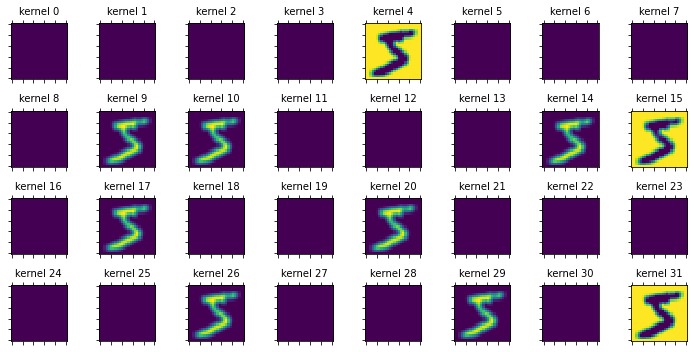

In [29]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

- 두 번째 레이어는 풀링 레이어인데, 출력 값은 (1, 13, 13, 32) 형태의 텐서이다.

In [30]:
# 두 번째 레이어(pool) 출력층 
pooling_activation = activations[1]
print(pooling_activation.shape)   

(1, 13, 13, 32)


- 역시 풀링 레이어를 거친 각 커널별 특성맵의 이미지를 시각화해보자.

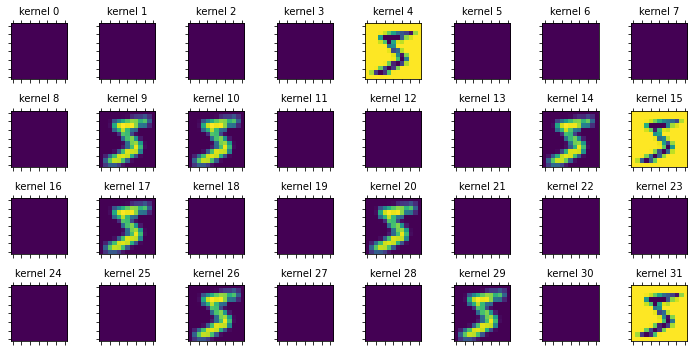

In [31]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

- 앞선 Conv2D 출력 이미지에 비해 화소의 크기가 굵어진 것을 확인할 수 있다.
- 최대 풀링(max pooling)은 픽셀 수는 줄이면서 특징을 더욱 강하게 드러낸다.

### **03 복잡한 모델 생성**

#### | **3-1 데이터셋 준비**
- 필요한 라이브러리를 호출한다.
- 또한 mnist 데이터셋을 불러와 훈련/검증 데이터셋으로 나눠 저장한다.

In [32]:
import tensorflow as tf
import numpy as np

In [33]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- 해당 이미지가 홀수인지 짝수인지에 대한 레이블값(`y_odd)`을 만들어 추가해보자.
- 즉, `y_train` 값이 홀수이면 1, 짝수이면 0인 `y_train_odd` 배열을 새로 만들 것이다.

In [34]:
# 새로운 출력값 배열을 생성 (홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

- `y_train_odd` 배열이 잘 만들어졌는지 확인해보자.

In [35]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


- 검증 데이터셋에 대해서도 동일한 작업을 수행한다.

In [36]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

- 이제 입력 이미지 데이터를 최대값인 255로 나눠 정규화한다.
- 텐서플로 `expand_dims()` 함수를 이용하여, 새로운 축을 추가하여 채널 개수를 1개로 지정한다. 축의 인덱스를 -1로 지정하면 새로운 측이 끝에 추가된다.


In [37]:
# 정규화(Normalization)
x_train = x_train/255.0
x_valid = x_valid/255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


#### | **3-2 Functional API로 다중 입력, 다중 출력 레이어 생성**
- 입력 레이어는 Conv2D 레이어와 Flatten 레이어의 입력으로 사용된다. 즉, 서로 다른 2개의 출력 레이어를 가진다.
- 그리고 이 레이어는 Concatenate 레이어에서 합쳐진 다음 Dense 레이어를 통과한다.

In [38]:
# Functional API를 사용하여 모델 생성
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)

concat = tf.keras.layers.Concatenate()([flat, flat_inputs])

outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

In [39]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

- 앞서 정의한 모델의 구조를 그래프로 출력해보자.
- 케라스 utils 모듈의 `plot_model` 함수를 이용한다.

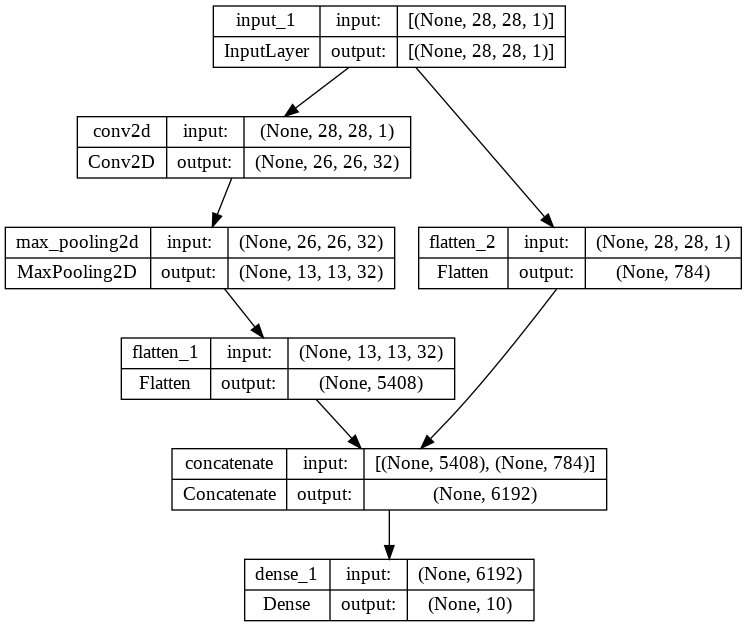

In [43]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

- 이제 다중 분류 모델에 맞게 손실 함수와 평가 지표를 지정하고, 옵티마이저로 adam을 지정하여 모델을 컴파일해보자.
- 그리고 모델 훈련 및 모델 예측 성능 평가를 수행한다.

In [45]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1322 - accuracy: 0.9623 - val_loss: 0.0787 - val_accuracy: 0.9761
Epoch 2/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0710 - accuracy: 0.9788 - val_loss: 0.0591 - val_accuracy: 0.9816
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0550 - accuracy: 0.9839 - val_loss: 0.0560 - val_accuracy: 0.9827
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0445 - accuracy: 0.9866 - val_loss: 0.0598 - val_accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0374 - accuracy: 0.9886 - val_loss: 0.0529 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0514 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0572 -

In [47]:
# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

313/313 [==============================] - 2s 8ms/step - loss: 0.0589 - accuracy: 0.9829
0.0588747076690197 0.9829000234603882


#### | **3-3 다중 출력 분류 모델**
- 이번에는 서로 다른 두 가지의 분류 문제를 예측하는 다중 출력 모델을 만들어보자.
- 앞에서 만든 홀수, 짝수 레이블 값을 활용한다.
- 다음과 같이 0~9까지의 숫자를 맞추는 분류 문제와 홀짝을 맞추는 분류 문제롤 동시에 해결하는 모델을 정의할 수 있다.
- 최종 출력 레이어를 2개 만드는 것이 핵심이다.

In [48]:
# Functional API를 사용하여 모델 생성
inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])

digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat) # 0~9까지의 숫자
odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs) # 홀짝

In [49]:
model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

In [50]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [51]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


- 모델 구조를 시각화해보자.

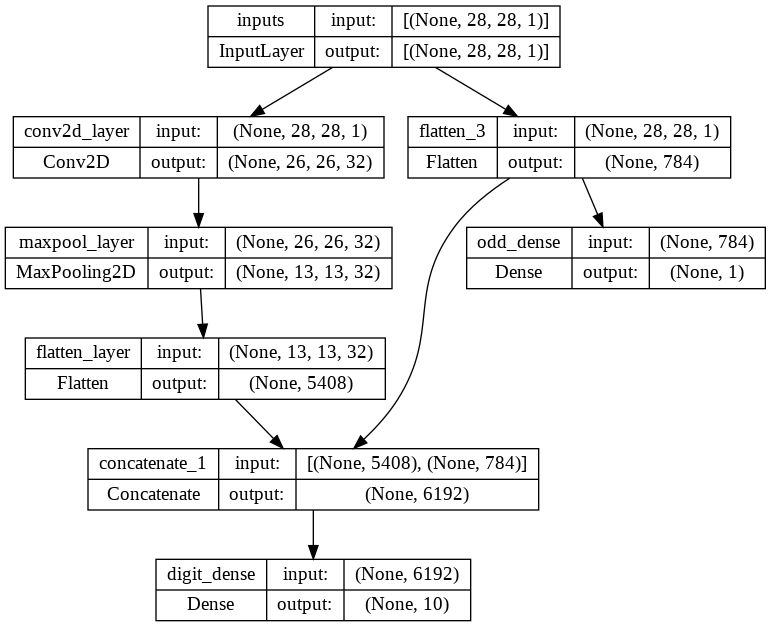

In [52]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

- 모델을 컴파일 할 때 주의할 것이 있다.
- 앞서 모델을 정의할 때, 출력 Dense 레이어의 name 속성을 각각 'digit_dense', 'odd_dense' 지정해주었다. 이 이름을 key로 하고, 해당 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정해주어야 한다.
- 모델 훈련 시에도 `fit()` 메소드에 출력 값을 2개 지정하여, 레이어 이름을 key로 하는 딕셔너리 형태로 각각에 맞는 타겟값 배열을 입력해야 한다. 검증 데이터셋 역시 구분하여 입력한다.

In [53]:
# 모델 컴파일
model.compile(optimizer='adam', 
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'}, 
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5}, # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

In [54]:
# 모델 훈련
history = model.fit({'inputs': x_train_in},
                    {'digit_dense': y_train, 'odd_dense': y_train_odd}, 
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3627 - digit_dense_loss: 0.2003 - odd_dense_loss: 0.3248 - digit_dense_accuracy: 0.9417 - odd_dense_accuracy: 0.8635 - val_loss: 0.2224 - val_digit_dense_loss: 0.0844 - val_odd_dense_loss: 0.2760 - val_digit_dense_accuracy: 0.9762 - val_odd_dense_accuracy: 0.8881
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2140 - digit_dense_loss: 0.0779 - odd_dense_loss: 0.2722 - digit_dense_accuracy: 0.9769 - odd_dense_accuracy: 0.8915 - val_loss: 0.1955 - val_digit_dense_loss: 0.0641 - val_odd_dense_loss: 0.2626 - val_digit_dense_accuracy: 0.9801 - val_odd_dense_accuracy: 0.8953
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1905 - digit_dense_loss: 0.0589 - odd_dense_loss: 0.2631 - digit_dense_accuracy: 0.9824 - odd_dense_accuracy: 0.8951 - val_loss: 0.1890 - val_digit_dense_loss: 0.0594 - val_odd_dense_loss: 0.2591 - val_digit_dense_accuracy: 0.9800 -

- 모델을 성능을 평가해보면, 숫자를 맞추는 문제는 약 98%, 홀수 여부 판단하는 문제는 약 90%의 정확도를 보인다.

In [55]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 3s 10ms/step - loss: 0.1880 - digit_dense_loss: 0.0605 - odd_dense_loss: 0.2551 - digit_dense_accuracy: 0.9833 - odd_dense_accuracy: 0.9018


[0.18802523612976074,
 0.060465678572654724,
 0.2551189064979553,
 0.983299970626831,
 0.9017999768257141]

- 검증 데이터셋의 첫번째 이미지는 숫자 7의 이미지이다.

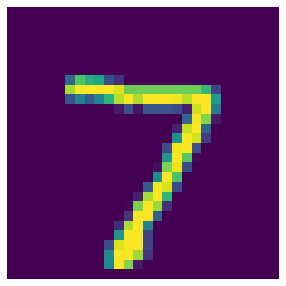

In [56]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)

- 해당 이미지에 대한 두 가지 예측 값을 확인해보자.
- 10개의 분류 레이블에 대한 확률과 홀수일 확률이 출력된다.

In [57]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 3s 10ms/step
[7.7768226e-12 1.9307912e-10 2.8748467e-10 4.8639768e-06 5.9289015e-12
 2.2679549e-12 7.0827364e-21 9.9999505e-01 1.0183613e-08 2.5050824e-09]
[0.99958205]


- 넘파이의 `argmax` 함수를 이용하면 예측 확률을 정답 레이블로 변환할 수 있다.

In [58]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

- 홀짝에 대한 정답 레이블은 임계값을 지정하여 변환할 수 있다.

In [59]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-59-cb61980817f6>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

#### | **3-4 전이 학습(Transfer Learning)**
- 앞서 훈련한 모델의 일부를 가져와 최종 출력층만 새롭게 추가하여 모델을 재구성할 수 있다.
- 이처럼 기존에 학습된 모델을 이용하여 새로운 모델을 만들어 내는 것을 전이 학습(Transfer Learning)이라고 한다.
- 먼저 앞에서 학습한 모델에서 입력 레이어부터 Flatten 층까지 해당하는 부분을 따로 추출하여 `base_model` 객체를 만든다.

In [60]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


- (28, 28, 1) 형태의 이미지를 받아 5,408개의 피처로 특징을 추출해 출력하는 모델이다.
- 모델의 구조를 시각화해보자.

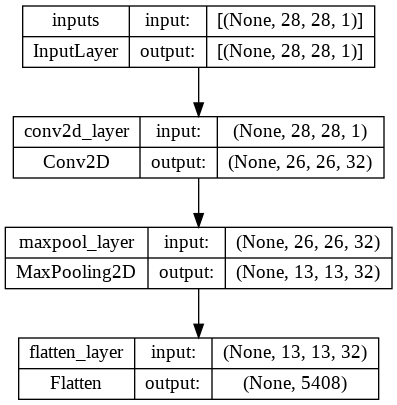

In [61]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

- Sequential API를 사용하여 앞에서 정의한 `base_model`을 레이어로 추가하고, 최종 분류기 역할을 하는 Dense 레이어를 새롭게 이어서 추가해보자.

In [62]:
# Sequential API 적용
digit_model = tf.keras.Sequential([base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),])

digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


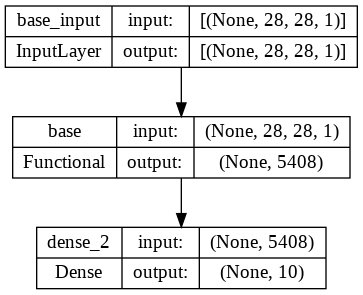

In [63]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')    

- 노드 10개를 가지는 Dense 레이어 `dense_2`가 추가된 것을 확인할 수 있다.
- 이제 모델을 컴파일하고 훈련을 해보자.

In [64]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1292 - accuracy: 0.9627 - val_loss: 0.0657 - val_accuracy: 0.9795
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0574 - accuracy: 0.9829 - val_loss: 0.0523 - val_accuracy: 0.9828
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0564 - val_accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0352 - accuracy: 0.9894 - val_loss: 0.0682 - val_accuracy: 0.9789
Epoch 5/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0589 - val_accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0243 - accuracy: 0.9927 - val_loss: 0.0543 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0565 -

- 모델 객체는 `trainable 속성을 가지고 있다. 이 속성을 `False`로 지정하면 모델의 파라미터 값이 고정되어 훈련을 통해 업데이트 되지 않는다.
- 이런 방식으로 `base_model_frozen`을 구성해보자

In [65]:
# 베이스 모델의 가중치를 고정 (Freeze Model)
base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


- 훈련 가능한 파라미터 개수가 0개인 것을 확인할 수 있다.
- 이번에는 Functional API를 이용하여 파라미터를 고정한 `base_model_input` 모델과 분류기 역할을 하는 Dense 레이어로 모델을 구성해보자.

In [66]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

- 총 파라미터 개수는 54,410개이고, 앞서 고정한 320개의 파라미터는 훈련이 불가능하다고 표시되어 있다.
- 즉, Flatten 레이어 이전에 존재하는 Conv2D 레이어 파라미터 320개는 포함되어 있지 않다.
- 모델을 컴파일하고 훈련해보자.

In [67]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1175 - accuracy: 0.9674 - val_loss: 0.0624 - val_accuracy: 0.9801
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0505 - accuracy: 0.9853 - val_loss: 0.0482 - val_accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0364 - accuracy: 0.9890 - val_loss: 0.0495 - val_accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.0503 - val_accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0230 - accuracy: 0.9933 - val_loss: 0.0571 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.0556 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.0601 -

- 모델 전체가 아니라 특정 레이어를 지정하여파라미터를 고정하는 방법도 있다.
- 아래는 Conv2D 레이어를 취소하고, trainable 속성을 False로 설정하는 예제이다.

In [68]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


- 새로운 분류기 역할을 하는 Dense 레이어를 연결하여 모델을 구성한다.

In [69]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

- 모델을 컴파일하고 훈련시킨다.
- 다양한 모델 구성 방법과 파라미터 조정 방법에 대해 이해하는 것은 중요하다.

In [70]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1181 - accuracy: 0.9681 - val_loss: 0.0550 - val_accuracy: 0.9834
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0501 - accuracy: 0.9854 - val_loss: 0.0521 - val_accuracy: 0.9831
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0484 - val_accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0283 - accuracy: 0.9914 - val_loss: 0.0536 - val_accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0228 - accuracy: 0.9933 - val_loss: 0.0549 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0183 - accuracy: 0.9946 - val_loss: 0.0534 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0154 - accuracy: 0.9952 - val_loss: 0.0527 - v